In [ ]:
#importing the Pandas and NumPy libraries in Python.
import pandas as pd
import numpy as np


***READING & EXPLORING THE DATASET USP_DRUG_CLASSIFICATION***

[Datatset link](https://www.kaggle.com/datasets/danofer/usp-drug-classification)

In [ ]:
#reading the dataset in variable df
df=pd.read_csv("usp_drug_classification (1).csv")
#printing first 5 records (0-4)
df.head()

,usp_category,usp_class,usp_drug,kegg_id_drug,drug_example,kegg_id_drug_example,nomenclature
0,Analgesics,Nonsteroidal Anti-inflammatory Drugs,celecoxib,NaN,celecoxib,D00567,(JAN/USAN/INN)
1,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac,D07816,(USAN/INN)
2,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac potassium,D00903,(USAN)
3,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac sodium,D00904,(JP17/USP)
4,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac diethylamine,D07817,NaN


In [ ]:
#all column names
df.columns

Index(['usp_category', 'usp_class', 'usp_drug', 'kegg_id_drug', 'drug_example',
       'kegg_id_drug_example', 'nomenclature'],
      dtype='object')

In [ ]:
df.shape

(1803, 7)

In [ ]:
#printing how many unique class labels are target variable i.e usp_category has
unique_cat=df['usp_category'].unique()
print(unique_cat)

['Analgesics' 'Anesthetics'
 'Anti-Addiction/Substance Abuse Treatment Agents' 'Antibacterials'
 'Anticonvulsants' 'Antidementia Agents' 'Antidepressants' 'Antiemetics'
 'Anti-inflammatory Agents' 'Antimigraine Agents' 'Antimyasthenic Agents'
 'Antimycobacterials' 'Antineoplastics' 'Antiparasitics'
 'Antiparkinson Agents' 'Antipsychotics' 'Antivirals' 'Anxiolytics'
 'Bipolar Agents' 'Blood Glucose Regulators'
 'Blood Products/Modifiers/Volume Expanders' 'Cardiovascular Agents'
 'Central Nervous System Agents' 'Gastrointestinal Agents'
 'Genitourinary Agents'
 'Hormonal Agents, Stimulant/Replacement/Modifying (Sex Hormones/Modifiers)'
 'Hormonal Agents, Suppressant (Thyroid)' 'Immunological Agents'
 'Inflammatory Bowel Disease Agents' 'Ophthalmic Agents'
 'Respiratory Tract/Pulmonary Agents' 'Sleep Disorder Agents'
 'Therapeutic Nutrients/Minerals/Electrolytes']


**PRE-PROCESSING THE DATA USP_DRUG_CLASSIFICATION**

In [ ]:
#the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1803 entries, 0 to 1802
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   usp_category          1803 non-null   object
 1   usp_class             1803 non-null   object
 2   usp_drug              1803 non-null   object
 3   kegg_id_drug          1343 non-null   object
 4   drug_example          1803 non-null   object
 5   kegg_id_drug_example  1803 non-null   object
 6   nomenclature          1673 non-null   object
dtypes: object(7)
memory usage: 98.7+ KB


In [ ]:
#number of null values in each column
df.isna().sum()

usp_category              0
usp_class                 0
usp_drug                  0
kegg_id_drug            460
drug_example              0
kegg_id_drug_example      0
nomenclature            130
dtype: int64

In [ ]:
#dropping the null values
df=df.dropna()
df.head()

,usp_category,usp_class,usp_drug,kegg_id_drug,drug_example,kegg_id_drug_example,nomenclature
1,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac,D07816,(USAN/INN)
2,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac potassium,D00903,(USAN)
3,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac sodium,D00904,(JP17/USP)
9,Analgesics,Nonsteroidal Anti-inflammatory Drugs,fenoprofen,DG00754,fenoprofen,D02350,(USAN/INN)
10,Analgesics,Nonsteroidal Anti-inflammatory Drugs,fenoprofen,DG00754,fenoprofen calcium,D00968,(JAN/USP)


In [ ]:
df.info()
#we see ambiguity in the indexing.
#1238 entries are present but the index is still ranging from 1-1744

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1238 entries, 1 to 1744
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   usp_category          1238 non-null   object
 1   usp_class             1238 non-null   object
 2   usp_drug              1238 non-null   object
 3   kegg_id_drug          1238 non-null   object
 4   drug_example          1238 non-null   object
 5   kegg_id_drug_example  1238 non-null   object
 6   nomenclature          1238 non-null   object
dtypes: object(7)
memory usage: 77.4+ KB


In [ ]:
#fixing the indexing ambiguity
df=df.reset_index()
df

,index,usp_category,usp_class,usp_drug,kegg_id_drug,drug_example,kegg_id_drug_example,nomenclature
0,1,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac,D07816,(USAN/INN)
1,2,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac potassium,D00903,(USAN)
2,3,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac sodium,D00904,(JP17/USP)
3,9,Analgesics,Nonsteroidal Anti-inflammatory Drugs,fenoprofen,DG00754,fenoprofen,D02350,(USAN/INN)
4,10,Analgesics,Nonsteroidal Anti-inflammatory Drugs,fenoprofen,DG00754,fenoprofen calcium,D00968,(JAN/USP)
...,...,...,...,...,...,...,...,...
1233,1734,Sleep Disorder Agents,GABA Receptor Modulators,zolpidem,DG00922,zolpidem,D08690,(INN)
1234,1735,Sleep Disorder Agents,GABA Receptor Modulators,zolpidem,DG00922,zolpidem tartrate,D00706,(JP17/USAN)
1235,1737,Sleep Disorder Agents,"Sleep Disorders, Other",doxepin,DG00937,doxepin,D07875,(INN)
1236,1738,Sleep Disorder Agents,"Sleep Disorders, Other",doxepin,DG00937,doxepin hydrochloride,D00814,(USP)


In [ ]:
#dropping the unecessary column- index
df=df.drop("index",axis="columns")
df.head()

,usp_category,usp_class,usp_drug,kegg_id_drug,drug_example,kegg_id_drug_example,nomenclature
0,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac,D07816,(USAN/INN)
1,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac potassium,D00903,(USAN)
2,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac sodium,D00904,(JP17/USP)
3,Analgesics,Nonsteroidal Anti-inflammatory Drugs,fenoprofen,DG00754,fenoprofen,D02350,(USAN/INN)
4,Analgesics,Nonsteroidal Anti-inflammatory Drugs,fenoprofen,DG00754,fenoprofen calcium,D00968,(JAN/USP)


In [ ]:
#checking if the indexing is updated
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   usp_category          1238 non-null   object
 1   usp_class             1238 non-null   object
 2   usp_drug              1238 non-null   object
 3   kegg_id_drug          1238 non-null   object
 4   drug_example          1238 non-null   object
 5   kegg_id_drug_example  1238 non-null   object
 6   nomenclature          1238 non-null   object
dtypes: object(7)
memory usage: 67.8+ KB


In [ ]:
#printing the dimension of the dataset after removal of NULL values
df.shape

(1238, 7)

In [ ]:
#checking if all NULL values are removed
df.isna().sum()

usp_category            0
usp_class               0
usp_drug                0
kegg_id_drug            0
drug_example            0
kegg_id_drug_example    0
nomenclature            0
dtype: int64

**APPLYING LABEL ENCODING TO CONVERT OBJECT ATTRIBUTES TO NUMERICAL**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

categ=['usp_category','usp_class', 'usp_drug', 'kegg_id_drug', 'drug_example',
       'kegg_id_drug_example','nomenclature']
df[categ] = df[categ].apply(le.fit_transform)

print(df[categ])

      usp_category  usp_class  usp_drug  kegg_id_drug  drug_example  \
0                0         90       116           139           261   
1                0         90       116           139           262   
2                0         90       116           139           263   
3                0         90       159           272           374   
4                0         90       159           272           375   
...            ...        ...       ...           ...           ...   
1233            30         71       432           326           997   
1234            30         71       432           326           998   
1235            30        115       130           334           297   
1236            30        115       130           334           298   
1237            31         65       307           275           709   

      kegg_id_drug_example  nomenclature  
0                      795            17  
1                      277            16  
2                 

In [ ]:
#displaying the encoded data
df

,usp_category,usp_class,usp_drug,kegg_id_drug,drug_example,kegg_id_drug_example,nomenclature
0,0,90,116,139,261,795,17
1,0,90,116,139,262,277,16
2,0,90,116,139,263,278,13
3,0,90,159,272,374,498,17
4,0,90,159,272,375,305,7
...,...,...,...,...,...,...,...
1233,30,71,432,326,997,950,1
1234,30,71,432,326,998,201,11
1235,30,115,130,334,297,803,1
1236,30,115,130,334,298,235,20


In [ ]:
#displaying the number or records that belong to each class
df["usp_category"].value_counts()

In [ ]:
df.dtypes

In [ ]:
#making a csv file of the new encoded numerical data
df.to_csv('new_dataset111.csv', index=False)

In [ ]:
#reading the new csv in a dataframe
dfnew=pd.read_csv("new_dataset111.csv")
dfnew

,usp_category,usp_class,usp_drug,kegg_id_drug,drug_example,kegg_id_drug_example,nomenclature
0,0,90,116,139,261,795,17
1,0,90,116,139,262,277,16
2,0,90,116,139,263,278,13
3,0,90,159,272,374,498,17
4,0,90,159,272,375,305,7
...,...,...,...,...,...,...,...
1233,30,71,432,326,997,950,1
1234,30,71,432,326,998,201,11
1235,30,115,130,334,297,803,1
1236,30,115,130,334,298,235,20


In [ ]:
#calculating correlation between all columns of the dataset
corr=dfnew.corr(method="pearson")

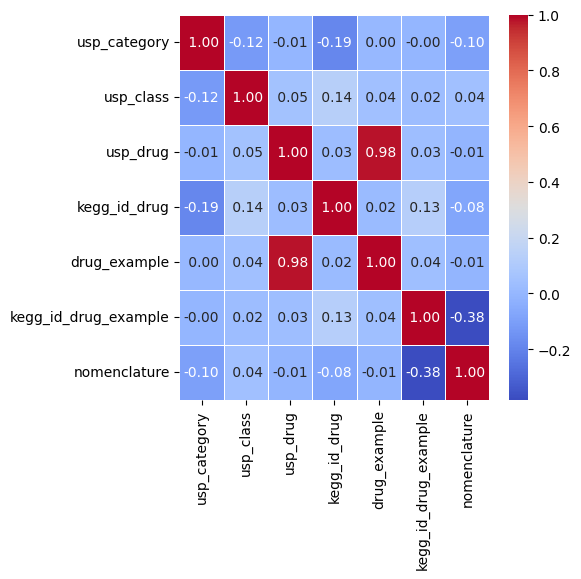

In [ ]:
#displaying the correlation with a heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5),dpi=100)
sns.heatmap(corr,cmap='coolwarm',annot=True,fmt=' .2f',linewidth=.5)
plt.show()

In [ ]:
#calculating importance score to reduce the datasetet
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# load your dataset into X and y
X = dfnew.iloc[:,1:7] #features
feature_cols = ['usp_class',  'usp_drug', 'kegg_id_drug', 'drug_example', 'kegg_id_drug_example', 'nomenclature']
y = dfnew.iloc[:,0].values #target variable

# train a Random Forest classifier on your data
clf = RandomForestClassifier()
clf.fit(X, y)

# extract feature importances from the trained classifier
importances = clf.feature_importances_

# create a dictionary to store the feature names and their importances
feature_importances = dict(zip(feature_cols, importances))

# sort the importances in descending order
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# print the features in order of importance
for feature in sorted_importances:
    print("Feature {}: Importance Score {}".format(feature[0], feature[1]))


Feature kegg_id_drug: Importance Score 0.3497563935432824
Feature usp_class: Importance Score 0.34184983808658365
Feature drug_example: Importance Score 0.10713240784217178
Feature usp_drug: Importance Score 0.09962222457803138
Feature kegg_id_drug_example: Importance Score 0.06648513548370012
Feature nomenclature: Importance Score 0.035154000466230594


In [ ]:
#seperating target variable and features in two variables
Y = dfnew[['usp_category']]
X = dfnew.drop (columns = ['usp_category','nomenclature'])

In [ ]:
X

,usp_class,usp_drug,kegg_id_drug,drug_example,kegg_id_drug_example
0,90,116,139,261,795
1,90,116,139,262,277
2,90,116,139,263,278
3,90,159,272,374,498
4,90,159,272,375,305
...,...,...,...,...,...
1233,71,432,326,997,950
1234,71,432,326,998,201
1235,115,130,334,297,803
1236,115,130,334,298,235


In [ ]:
Y

,usp_category
0,0
1,0
2,0
3,0
4,0
...,...
1233,30
1234,30
1235,30
1236,30


**SPLITTING THE DATA INTO TRAINING AND TESTING FOR APPLYING CLASSIFICATION ALGORITHMS**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.35, random_state = 55)

In [ ]:
x_test

,usp_class,usp_drug,kegg_id_drug,drug_example,kegg_id_drug_example
648,16,279,221,648,273
103,6,208,31,495,562
996,79,268,263,621,654
1075,92,139,399,318,398
1106,94,319,366,743,682
...,...,...,...,...,...
683,41,56,324,124,769
387,29,336,120,788,122
710,28,245,41,566,294
448,40,41,212,89,986


In [ ]:
x_train

,usp_class,usp_drug,kegg_id_drug,drug_example,kegg_id_drug_example
564,0,168,308,391,822
978,69,150,149,358,617
370,29,121,122,277,568
525,37,237,376,554,248
1085,94,25,404,53,322
...,...,...,...,...,...
541,25,121,122,277,568
968,8,387,147,902,699
295,112,112,350,245,793
666,21,430,230,993,405


In [ ]:
y_train

,usp_category
564,15
978,25
370,8
525,13
1085,28
...,...
541,14
968,25
295,7
666,16


In [ ]:
#lengths of training and testing data
len(x_train),len(x_test),len(y_train),len(y_test)

(804, 434, 804, 434)

**APPLYING NAIVE BAYE'S ALGORITHM**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
#creating object of the gaussianNB
naiev = GaussianNB()

In [ ]:
#training the model
naiev_model = naiev.fit(x_train , y_train)
naiev_model
print('The model has ran Successfully!')

The model has ran Successfully!


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#diplaying the actual values and predicted values of the test data
y_test['Predicted'] = naiev_model.predict(x_test)

In [ ]:
y_test

,usp_category,Predicted
648,16,16
103,4,21
996,26,12
1075,28,28
1106,28,0
...,...,...
683,17,29
387,8,21
710,19,21
448,11,11


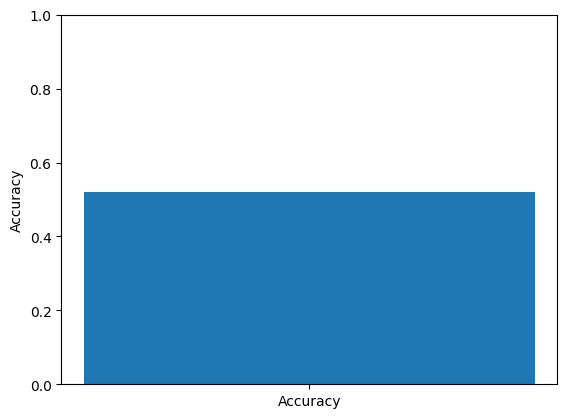

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# calculate the accuracy
accuracy = accuracy_score(y_test['usp_category'],y_test['Predicted'])

# create a bar plot of the accuracy
plt.bar(['Accuracy'], [accuracy])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.show()


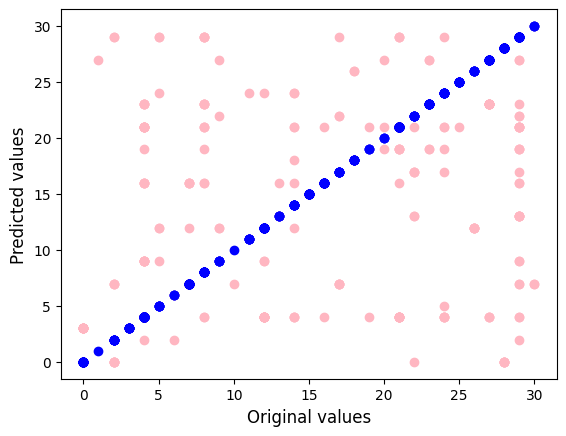

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# assuming y_test['usp_category'] and y_test['Predicated'] are numerical values
x = y_test['usp_category']
y = y_test['Predicted']

# create a scatter plot of the predicted values and the original values
plt.scatter(x, y, c='lightpink')
plt.xlabel('Original values', fontsize=12)
plt.ylabel('Predicted values', fontsize=12)
plt.scatter(x, x, c='blue')
plt.show()



**CLASSIFICATION REPORT AND CONFUSION MATRIX**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
print(confusion_matrix(y_test['usp_category'],y_test['Predicted']))


[[13  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  1  0  0  0]
 [ 5  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  2  0]
 [ 0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  1  0 37  0  0  0  0  6  0  0  0  0  0  0  4  0  0  1  0  7  0  4
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  2  0  0  0  0  0  0  0  0  0  0  0
   1  0  0  0  0  2  0]
 [ 0  0  1  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 22  0  0  0  0  1  0  0  0  4  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  1  0  0  0  0  0  0  0  2  0  0  1  0  3  0  4
   0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  2  0  0  0  0  0  0  0  0  0  1  0
   0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0 

In [ ]:
report = classification_report(y_test['usp_category'],y_test['Predicted'])

# Print classification report
print(report)

              precision    recall  f1-score   support

           0       0.54      0.57      0.55        23
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        10
           3       0.44      1.00      0.62         8
           4       0.53      0.62      0.57        60
           5       0.00      0.00      0.00         6
           6       1.00      0.67      0.80         3
           7       0.65      0.81      0.72        27
           8       1.00      0.06      0.11        17
           9       0.08      0.20      0.12         5
          10       0.00      0.00      0.00         1
          11       1.00      0.83      0.91         6
          12       0.50      0.48      0.49        23
          13       0.30      0.75      0.43         4
          14       0.00      0.00      0.00        10
          15       1.00      1.00      1.00        17
          16       0.52      0.89      0.65        18
          17       0.17    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy = accuracy_score(y_test['usp_category'],y_test['Predicted'])
class_names1=['Analgesics','Anesthetics',
 'Anti-Addiction/Substance Abuse Treatment Agents','Antibacterials',
 'Anticonvulsants','Antidementia Agents','Antidepressants','Antiemetics',
 'Anti-inflammatory Agents','Antimigraine Agents','Antimyasthenic Agents',
 'Antimycobacterials','Antineoplastics','Antiparasitics',
 'Antiparkinson Agents','Antipsychotics','Antivirals','Anxiolytics',
 'Bipolar Agents','Blood Glucose Regulators',
 'Blood Products/Modifiers/Volume Expanders','Cardiovascular Agents',
 'Central Nervous System Agents','Gastrointestinal Agents',
 'Genitourinary Agents',
 'Hormonal Agents, Stimulant/Replacement/Modifying (Sex Hormones/Modifiers)',
 'Hormonal Agents, Suppressant (Thyroid)','Immunological Agents',
 'Inflammatory Bowel Disease Agents','Ophthalmic Agents',
 'Respiratory Tract/Pulmonary Agents','Sleep Disorder Agents',
 'Therapeutic Nutrients/Minerals/Electrolytes']

accuracy = np.round(accuracy,2)

In [ ]:
print("Accuracy of the model is: ",(accuracy)*100,"%")

Accuracy of the model is:  52.0 %


In [ ]:
from sklearn.metrics import accuracy_score
unique_labels = sorted(y_test['usp_category'].unique())
for label in unique_labels:
    class_accuracy = accuracy_score(y_test[y_test['usp_category'] == label]['usp_category'], y_test[y_test['usp_category'] == label]['Predicted'])
    print("Class {} Accuracy: {}".format(label, class_accuracy))


Class 0 Accuracy: 0.5652173913043478
Class 1 Accuracy: 0.0
Class 2 Accuracy: 0.0
Class 3 Accuracy: 1.0
Class 4 Accuracy: 0.6166666666666667
Class 5 Accuracy: 0.0
Class 6 Accuracy: 0.6666666666666666
Class 7 Accuracy: 0.8148148148148148
Class 8 Accuracy: 0.058823529411764705
Class 9 Accuracy: 0.2
Class 10 Accuracy: 0.0
Class 11 Accuracy: 0.8333333333333334
Class 12 Accuracy: 0.4782608695652174
Class 13 Accuracy: 0.75
Class 14 Accuracy: 0.0
Class 15 Accuracy: 1.0
Class 16 Accuracy: 0.8888888888888888
Class 17 Accuracy: 0.125
Class 18 Accuracy: 0.75
Class 19 Accuracy: 0.3333333333333333
Class 20 Accuracy: 0.0
Class 21 Accuracy: 0.6444444444444445
Class 22 Accuracy: 0.0
Class 23 Accuracy: 0.6923076923076923
Class 24 Accuracy: 0.09090909090909091
Class 25 Accuracy: 0.9090909090909091
Class 26 Accuracy: 0.16666666666666666
Class 27 Accuracy: 0.4090909090909091
Class 28 Accuracy: 0.8
Class 29 Accuracy: 0.06666666666666667
Class 30 Accuracy: 0.3333333333333333


In [ ]:
d1 = X.iloc[99]
val_data = pd.DataFrame(d1)
val_data.transpose()


,usp_class,usp_drug,kegg_id_drug,drug_example,kegg_id_drug_example
99,6,15,128,30,262


In [ ]:
val_data1 = naiev.predict(val_data.transpose())
val_data1

array([4])

In [ ]:
d2= X.iloc[14]
val_data = pd.DataFrame(d2)
val_data.transpose()


,usp_class,usp_drug,kegg_id_drug,drug_example,kegg_id_drug_example
14,90,205,67,488,25


In [ ]:
val_data1 = naiev.predict(val_data.transpose())
val_data1

array([3])

**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
regressor=DecisionTreeClassifier(criterion="gini",max_depth=5,splitter='best') #gini=selection  criteria depth=max depth of the d.tree splitter=

regressor = regressor.fit(x_train , y_train)
regressor
print('The model has ran Successfully!')

The model has ran Successfully!


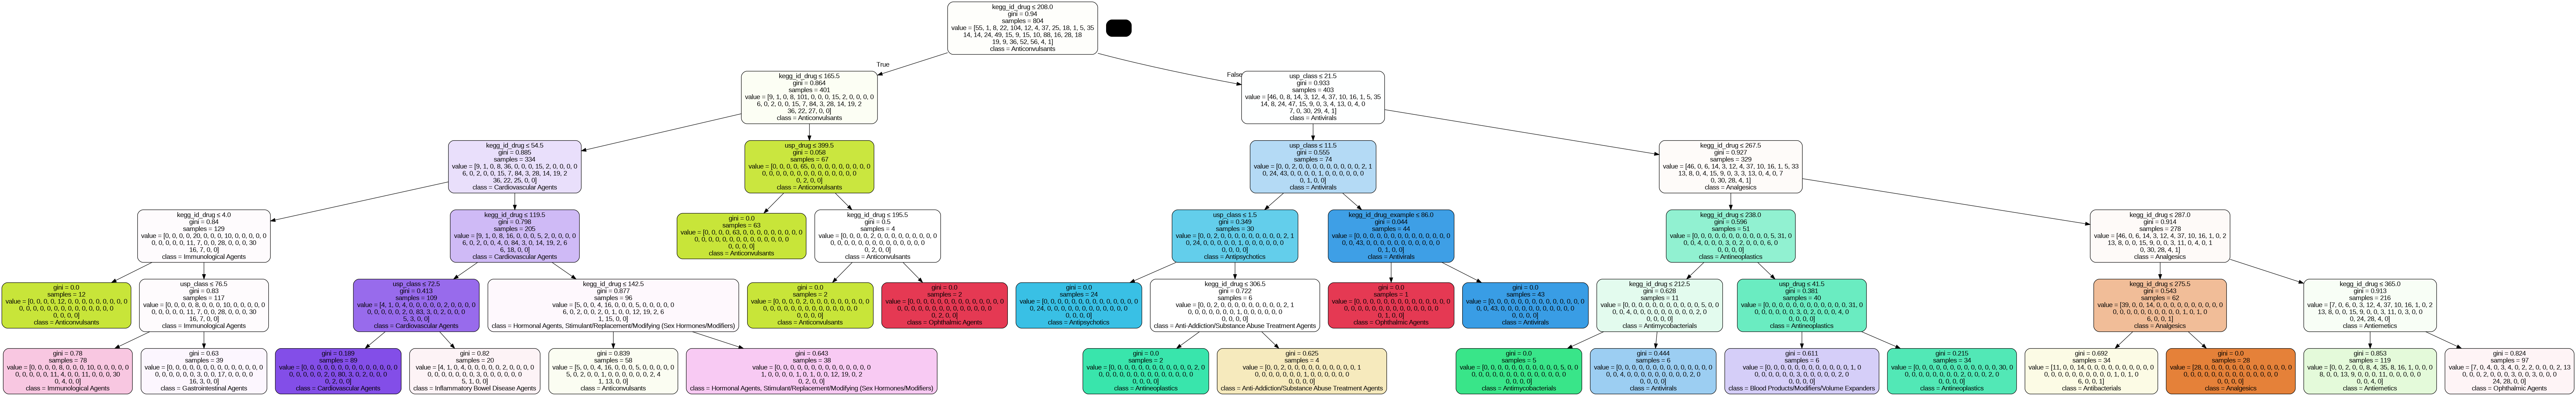

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
feature_cols=['usp_class', 'usp_drug', 'kegg_id_drug', 'drug_example','kegg_id_drug_example'] #feature names
export_graphviz(regressor,out_file=dot_data,filled=True,rounded=True,special_characters=True,
                feature_names=feature_cols,class_names=['Analgesics','Anesthetics',
 'Anti-Addiction/Substance Abuse Treatment Agents','Antibacterials',
 'Anticonvulsants','Antidementia Agents','Antidepressants','Antiemetics',
 'Anti-inflammatory Agents','Antimigraine Agents','Antimyasthenic Agents',
 'Antimycobacterials','Antineoplastics','Antiparasitics',
 'Antiparkinson Agents','Antipsychotics','Antivirals','Anxiolytics',
 'Bipolar Agents','Blood Glucose Regulators',
 'Blood Products/Modifiers/Volume Expanders','Cardiovascular Agents',
 'Central Nervous System Agents','Gastrointestinal Agents',
 'Genitourinary Agents',
 'Hormonal Agents, Stimulant/Replacement/Modifying (Sex Hormones/Modifiers)',
 'Hormonal Agents, Suppressant (Thyroid)','Immunological Agents',
 'Inflammatory Bowel Disease Agents','Ophthalmic Agents',
 'Respiratory Tract/Pulmonary Agents','Sleep Disorder Agents',
 'Therapeutic Nutrients/Minerals/Electrolytes']) #regression=treemodel,filled takes care of colours rounded means round boxes
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("tree-k.png")
Image(graph.create_png())

In [ ]:
y_test['Predicted'] = regressor.predict(x_test)
accuracy = accuracy_score(y_test['usp_category'],y_test['Predicted'])
accuracy = np.round(accuracy,2)
print("Accuracy of the model is: ",(accuracy)*100,"%")

Accuracy of the model is:  56.00000000000001 %


**CLUSTERING**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df_kmeans=scaler.fit_transform(dfnew)

In [ ]:
scaled_df_kmeans

array([[-1.59979953,  0.84292198, -0.82540598, ..., -0.83630087,
         0.98472134,  0.90695059],
       [-1.59979953,  0.84292198, -0.82540598, ..., -0.8328296 ,
        -0.76082911,  0.76294587],
       [-1.59979953,  0.84292198, -0.82540598, ..., -0.82935833,
        -0.75745932,  0.3309317 ],
       ...,
       [ 1.55478261,  1.55007895, -0.71179557, ..., -0.71133521,
         1.01167965, -1.39712499],
       [ 1.55478261,  1.55007895, -0.71179557, ..., -0.70786394,
        -0.90236023,  1.33896476],
       [ 1.65993535,  0.135765  ,  0.72456462, ...,  0.71882732,
        -1.27977654, -0.38909192]])

In [ ]:
from sklearn.cluster import KMeans
kmeans_model=KMeans(n_clusters=4)
clusters=kmeans_model.fit_predict(scaled_df_kmeans)
dfnew.insert(dfnew.columns.get_loc("usp_category"),"Clusters",clusters)
dfnew

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Clusters,usp_category,usp_class,usp_drug,kegg_id_drug,drug_example,kegg_id_drug_example,nomenclature
0,2,0,90,116,139,261,795,17
1,2,0,90,116,139,262,277,16
2,2,0,90,116,139,263,278,13
3,2,0,90,159,272,374,498,17
4,2,0,90,159,272,375,305,7
...,...,...,...,...,...,...,...,...
1233,0,30,71,432,326,997,950,1
1234,1,30,71,432,326,998,201,11
1235,0,30,115,130,334,297,803,1
1236,3,30,115,130,334,298,235,20


In [ ]:
# Print a summary of the clustering
print("Clustering summary:")
for i in range(len(dfnew["Clusters"].unique())):
    count = len(dfnew[dfnew["Clusters"]==i])
    print(f"Cluster {i}: {count} records")

# Print how the records are mapped to each cluster
print("\nMapping of records to clusters:")
for i in range(len(dfnew["Clusters"].unique())):
    cluster = dfnew[dfnew["Clusters"]==i]
    records = cluster["usp_category"].tolist()
    print(f"Cluster {i}: {len(records)} records")
    print(records)
    print("\n")

Clustering summary:
Cluster 0: 250 records
Cluster 1: 338 records
Cluster 2: 226 records
Cluster 3: 424 records

Mapping of records to clusters:
Cluster 0: 250 records
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 9, 9, 9, 9, 9, 9, 9, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 19, 19, 19, 19, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

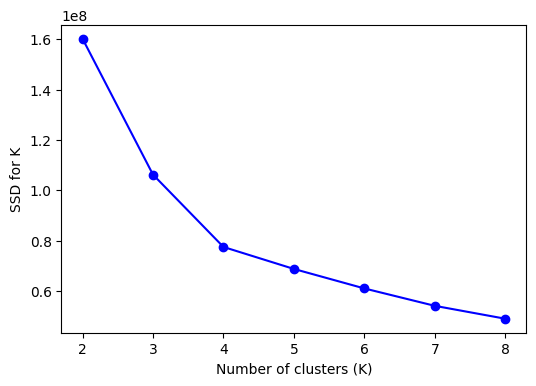

In [ ]:
import matplotlib.pyplot as plt
ssd=[] #sum of squared didstances
for k in range(2,9):
    kmeans_model=KMeans(n_clusters=k)
    kmeans_model.fit(dfnew)
    ssd.append(kmeans_model.inertia_)
plt.figure(figsize=(6,4),dpi=100)
plt.plot(range(2,9),ssd,color="blue",marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSD for K")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

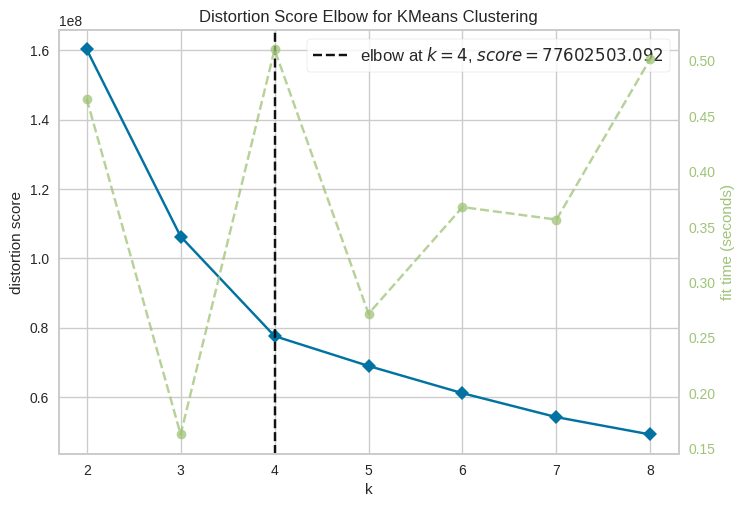

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,9))

visualizer.fit(dfnew)
visualizer.show()
